In [1]:

import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import joblib
import matplotlib.pyplot as plt


In [ ]:
#  File Paths

In [2]:

feature_path = "C:/Users/user/Desktop/main/AI_Smart_City/data/features"
model_path = "C:/Users/user/Desktop/main/AI_Smart_City/models"

In [3]:
os.makedirs(model_path, exist_ok=True)


In [ ]:
#   Load Dataset

In [4]:


print(" Loading traffic feature dataset...")
traffic = pd.read_csv(os.path.join(feature_path, "traffic_features.csv"))

print("Dataset loaded successfully!")
print("Shape:", traffic.shape)
print(traffic.head())

 Loading traffic feature dataset...
Dataset loaded successfully!
Shape: (44651, 15)
  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0     NaN  288.28      0.0      0.0          40       Clouds   
1     NaN  289.36      0.0      0.0          75       Clouds   
2     NaN  289.58      0.0      0.0          90       Clouds   
3     NaN  290.13      0.0      0.0          90       Clouds   
4     NaN  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  hour  day  month  \
0    scattered clouds  2012-10-02 09:00:00            5545     9    2     10   
1       broken clouds  2012-10-02 10:00:00            4516    10    2     10   
2     overcast clouds  2012-10-02 11:00:00            4767    11    2     10   
3     overcast clouds  2012-10-02 12:00:00            5026    12    2     10   
4       broken clouds  2012-10-02 13:00:00            4918    13    2     10   

   day_of_week  is_weekend  traffic_peak  
0      

In [5]:
# Data Preprocessing

In [6]:
# Drop non-numeric columns except datetime-related ones
traffic = traffic.select_dtypes(include=['number'])


In [7]:
# Handle missing values if any
traffic = traffic.fillna(traffic.median(numeric_only=True))

In [10]:
# Check target variable
if 'traffic_volume' not in traffic.columns:
    raise ValueError(" 'traffic_volume' column not found in dataset!")

In [11]:
# Split data into features and target
X = traffic.drop(columns=['traffic_volume'])
y = traffic['traffic_volume']

In [12]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
print("Data split into train and test sets")
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Data split into train and test sets
Training samples: 35720
Testing samples: 8931


In [14]:
# Model Training – XGBoost Regressor

In [15]:
print("\n🚀 Training XGBoost Model...")
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective='reg:squarederror'
)

xgb_model.fit(X_train, y_train)


🚀 Training XGBoost Model...


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [16]:
# Evaluation

In [18]:
y_pred = xgb_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"RMSE (Root Mean Square Error): {rmse:.2f}")
print(f"R² Score: {r2:.3f}")


Model Evaluation:
RMSE (Root Mean Square Error): 322.26
R² Score: 0.974


In [19]:
#  Visualization

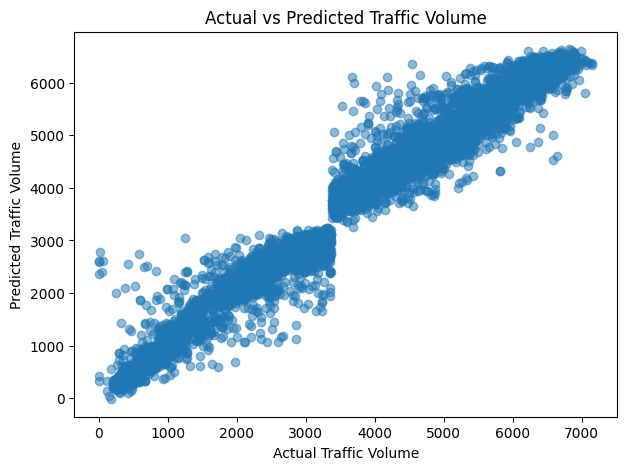

In [20]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Traffic Volume")
plt.ylabel("Predicted Traffic Volume")
plt.title("Actual vs Predicted Traffic Volume")
plt.show()

In [21]:
# Save Model

In [23]:
model_file = os.path.join(model_path, "traffic_model.pkl")
joblib.dump(xgb_model, model_file)
print(f" Model saved successfully at: {model_file}")

 Model saved successfully at: C:/Users/user/Desktop/main/AI_Smart_City/models\traffic_model.pkl


In [24]:
# Save Predictions (Optional for Power BI)

In [25]:
pred_df = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})
pred_df.to_csv(os.path.join(model_path, "traffic_predictions.csv"), index=False)
print(" Saved traffic_predictions.csv")

print("\n Training complete! Model ready for integration.")

 Saved traffic_predictions.csv

 Training complete! Model ready for integration.
